# CMIP6 $\Delta P/\Delta T$ (2)
## Goal: update [Flaschner et al 2016](https://journals.ametsoc.org/doi/10.1175/JCLI-D-15-0351.1) [figure 1](https://journals.ametsoc.org/na101/home/literatum/publisher/ams/journals/content/clim/2016/15200442-29.2/jcli-d-15-0351.1/20160112/images/large/jcli-d-15-0351.1-f1.jpeg) with CMIP6 data

![](jcli-d-15-0351.1-f1.jpeg)

### Using CESM2 from the CMIP analysis platform repository on glade

In [26]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
from scipy import stats

plt.rcParams['figure.figsize'] = (8,5)

### Open the surface temperature file for abrupt4xCO2

In [2]:
var="ts"
file="/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/"+var+"/gn/latest/"+var+"_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc"

/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ts/gn/latest/ts_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc


In [3]:
ds = xr.open_dataset(file)

### Get the cell area to calculate the area weights

In [4]:
areads = xr.open_dataset("/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/fx/areacella/gn/latest/areacella_fx_CESM2_abrupt-4xCO2_r1i1p1f1_gn.nc")
weight=areads.areacella / areads.areacella.sum(dim=('lon','lat'))
weight.sum(dim=('lon','lat'))

<xarray.DataArray 'areacella' ()>
array(1., dtype=float32)

### Calculate the global mean

In [5]:
tsGm=(np.tile(weight,[len(ds.time),1,1])*ds.ts).sum(dim=('lat','lon'))

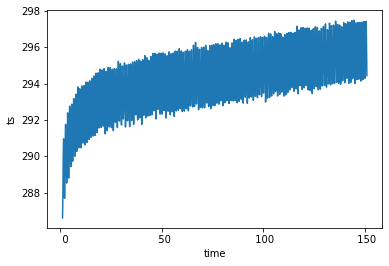

In [6]:
tsGm.plot()

### Calculate the annual mean

In [7]:
tsGm_annual = tsGm.resample(time='A',label='left',loffset='6M').mean(dim='time')

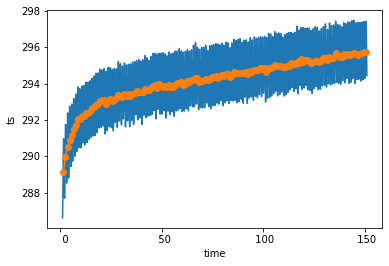

In [8]:
tsGm.plot()
tsGm_annual.plot(marker='o')

### Precip for 4xCO2

In [10]:
var="pr"
filep="/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/"+var+"/gn/latest/"+var+"_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc"
dsp = xr.open_dataset(filep)
prGm=(np.tile(weight,[len(dsp.time),1,1])*dsp.pr).sum(dim=('lat','lon'))

In [11]:
prGm_annual = prGm.resample(time='A',label='left',loffset='6M').mean(dim='time')

In [13]:
# These are coversion factors
L=2.5e6
wm2tommd=1./L*3600*24

Text(0.5, 1.0, 'CESM2')

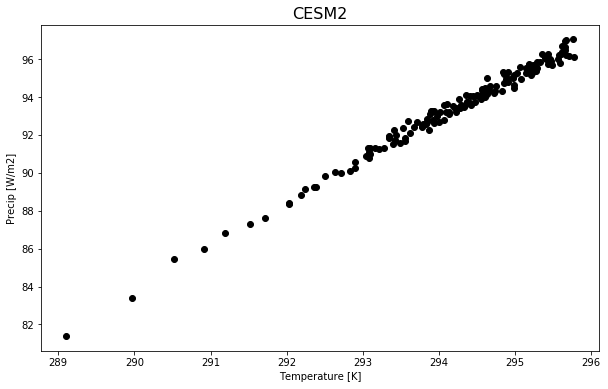

In [14]:
# Create a figure
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(tsGm_annual,prGm_annual*L,marker='o',linestyle='None',color='k')
ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Precip [W/m2]')
ax.set_title('CESM2', fontdict={'size':16})


### Now get the baseline data from the preindustrial control sims

In [15]:
experiment='piControl'
var="ts"
ds_ts_pi_all = xr.open_mfdataset("/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/"+experiment+"/r1i1p1f1/Amon/"+var+"/gn/latest/"+var+"_Amon_CESM2_"+experiment+"_r1i1p1f1_gn_*.nc")

In [16]:
endtimes=ds_ts_pi_all.time[-(12*30):]
ts_pi=ds_ts_pi_all.ts.sel(time=slice(endtimes[0],endtimes[-1])).mean(dim=('time'))
ts_pi_gm=(ts_pi*weight).sum(dim=('lat','lon'))
ts_pi_gm.values

array(288.37387, dtype=float32)

In [17]:
experiment='piControl'
var="pr"
ds_pr_pi_all = xr.open_mfdataset("/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/"+experiment+"/r1i1p1f1/Amon/"+var+"/gn/latest/"+var+"_Amon_CESM2_"+experiment+"_r1i1p1f1_gn_*.nc")

In [18]:
pr_pi=ds_pr_pi_all.pr.sel(time=slice(endtimes[0],endtimes[-1])).mean(dim=('time'))
pr_pi_gm=(pr_pi*weight).sum(dim=('lat','lon'))
pr_pi_gm.values

array(3.411867e-05, dtype=float32)

([<matplotlib.axis.XTick at 0x2adda3f19e10>,
 <a list of 7 Text xticklabel objects>)

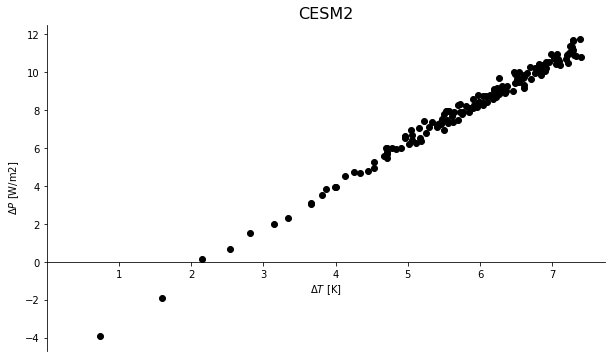

In [19]:
# Create a figure
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(tsGm_annual-ts_pi_gm,(prGm_annual-pr_pi_gm)*L,marker='o',linestyle='None',color='k')
ax.set_xlabel('$\Delta T$ [K]')
ax.set_ylabel('$\Delta P$ [W/m2]')
ax.set_title('CESM2', fontdict={'size':16})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
lims=plt.xlim()
plt.xlim(0,lims[1])
plt.xticks(np.arange(1,lims[1]))

In [20]:
dt=tsGm_annual-ts_pi_gm
dp=(prGm_annual-pr_pi_gm)*L

### Add linear regression
Two methods, both from [Jen Kay's class](https://github.com/jenkayco/ATOC7500ObjectiveDataAnalysis/blob/master/ATOC7500_applicationlab2_AR1_regression_AO.ipynb)

In [21]:
### Calculate the correlation statistics - slow way, but convenient
slope, intercept, r_value, p_value, std_err = stats.linregress(dt,dp)
print('scipy.stats.linregress slope: ',round(slope,3))
print('scipy.stats.linregress intercept: ',round(intercept,3))
print('scipy.stats.linregress r_value: ',round(r_value,3))

### Calculate the correlation statistics - direct and fast way
### for reference, answers should be the same...
### Shows direct calculation using Barnes notes
xdata=dt-np.mean(dt)
ydata=dp-np.mean(dp)
variancex=np.sum((xdata*xdata))
covariance=np.dot(xdata,ydata)
slope_fast=covariance/variancex                          ##Barnes Chapter 2, Eq. (14)
intercept_fast=np.mean(dp)-slope_fast*np.mean(dt)  ##Barnes Chapter 2, Eq. (15)
variancey=np.sum((ydata*ydata))
rvalue_fast=np.dot(xdata,ydata)/(np.sqrt(variancex)*np.sqrt(variancey)) ##Barnes Chapter 2, Eq. (31)
print('direct method slope_fast: ',np.round(slope_fast,3))
print('direct method intercept_fast: ',np.round(intercept_fast,3))
print('direct method rvalue_fast: ',np.round(rvalue_fast,3))

scipy.stats.linregress slope:  2.199
scipy.stats.linregress intercept:  -4.73
scipy.stats.linregress r_value:  0.994
direct method slope_fast:  <xarray.DataArray ()>
array(2.199, dtype=float32)
direct method intercept_fast:  <xarray.DataArray ()>
array(-4.73, dtype=float32)
direct method rvalue_fast:  <xarray.DataArray ()>
array(0.994, dtype=float32)


In [22]:
# from https://plot.ly/matplotlib/linear-fits/
xi = np.array([0,dt.max()])
line = slope*xi+intercept


In [23]:
#find where to put the annotation
abm=abs(dt-5)
i=np.where(abm==abm.min())
dp[i].values

array([6.1986613], dtype=float32)

Text(<xarray.DataArray ()>
dask.array<shape=(), dtype=float32, chunksize=()>, <xarray.DataArray ()>
dask.array<shape=(), dtype=float32, chunksize=()>, '4xCO2:\nafter 150 years')

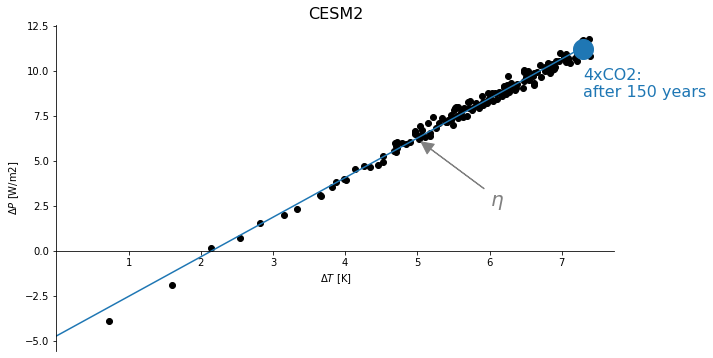

In [24]:
# Create a figure
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(dt,dp,marker='o',linestyle='None',color='k',mfc='k')
ax.set_xlabel('$\Delta T$ [K]')
ax.set_ylabel('$\Delta P$ [W/m2]')
ax.set_title('CESM2', fontdict={'size':16})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
lims=plt.xlim()
plt.xlim(0,lims[1])
plt.xticks(np.arange(1,lims[1]))

# heres the regression line
plt.plot(xi, line)

# here's the value after 150 yrs
plt.plot(dt[-10:].mean(),dp[-10:].mean(),'o',markersize=20,color='C0')

# annotation
ax.annotate('$\eta$', xy=(5, dp[i]), xytext=(6, 2.5),
            arrowprops=dict(color='grey',width=0.4,shrink=0.05),fontsize=20,color='grey'
            )

ax.text(dt[-10:].mean(),dp[-10:].mean()-1,'4xCO2:\nafter 150 years',verticalalignment='top',fontsize=16,color='C0')


### Write out the figure to a pdf

In [25]:
fig.savefig('cesm2_dpdt.pdf')